**Questions 7 and 8**

**Question 7 (correlation of weight vs. age)**

In [2]:
%matplotlib inline

In [3]:
import thinkstats2
import thinkplot

In [4]:
import nsfg
preg = nsfg.ReadFemPreg()

In [5]:
live = preg[preg.outcome == 1]
weight, age = live.totalwgt_lb, live.agepreg


*Scatter plot for birth weight versus age*

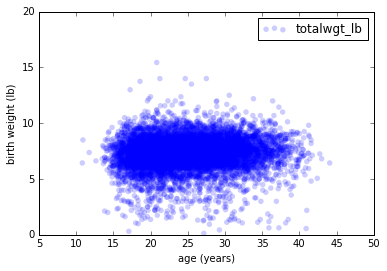

In [6]:
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel='age (years)', ylabel='birth weight (lb)', axis=[5,50, 0, 20])

The scatter plot shows a weak relationship between variables.

*Percentiles of birth weight versus age*

In [7]:
import numpy as np
d = live.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = np.arange(5, 50, 5)
indices = np.digitize(d.agepreg, bins)
groups = d.groupby(indices)


In [8]:
ages = [group.agepreg.mean() for i , group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

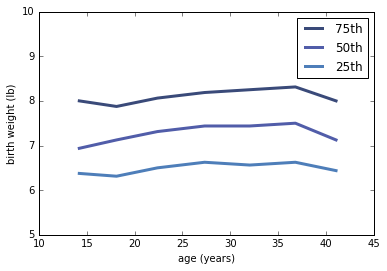

In [9]:
for percent in [75, 50, 25]:
    weights =[cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' %percent
    thinkplot.Plot(ages, weights, label=label)
thinkplot.Show(xlabel='age (years)', ylabel='birth weight (lb)', axis=[10, 45, 5, 10])

*The graph shows a non-linear relationship between variables*

Correlations'

*Remove nan from data*

In [12]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

*Compute Pearson's correlation*

In [13]:
thinkstats2.Corr(live.agepreg, live.totalwgt_lb)

0.068833970354109084

*Compute Spearman's correlation*

In [14]:
thinkstats2.SpearmanCorr(live.agepreg, live.totalwgt_lb)

0.094610041096582262

*The correlation numbers (0.06 and 0.09) help support the assumption that there is no relationship between variables.  However, the difference between both numbers might imply the presence of outliers or a non-linear relationship.*

**Question 8 (sampling distribution)**

In [15]:
%matplotlib inline

In [16]:
import thinkstats2
import thinkplot

In [17]:
from estimation import Estimate4

*Plot sampling distribution of estimate L.*

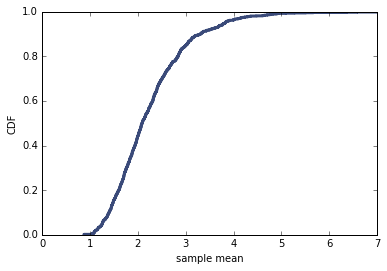

In [19]:
means, rsme, ci_5, ci_95 = Estimate4(n=10, m=1000)
cdf = thinkstats2.Cdf(means)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='sample mean', ylabel='CDF',axis=[0, 7, 0, 1])

*standard error*

In [31]:
rsme

0.7830483119875775

*90% confidence interval*

In [32]:
(ci_5, ci_95)

(1.3102119985042806, 3.6270191938419138)

*Repeat the experiment with different n values*

In [36]:
rsme_list = []
n_list = []
ci_list = []
for i in [10, 50, 100, 250, 500]:
    means, rsme, ci_5, ci_95 = Estimate4(n=i, m=1000)
    rsme_list.append(rsme)
    n_list.append(i)
    ci_list.append((ci_5, ci_95))

*Plot standard error versus n*

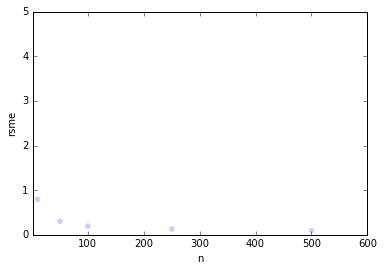

In [37]:
thinkplot.Scatter(n_list, rsme_list)
thinkplot.Show(xlabel='n', ylabel='rsme', axis=[1,600, 0, 5])

*From the graph, we can see that as sample size increases, the standard error gets smaller*

In [38]:
ci_list

[(1.3014936570142668, 3.682609513781931),
 (1.5874772321575801, 2.5753468176930867),
 (1.7149044372641205, 2.3500031597806728),
 (1.7885963205464845, 2.2156802153776822),
 (1.8631582226362577, 2.157985614637747)]

*We can also see that as the sample size increses, the confidence intervals decreases*